# Estimando o preço ideal de venda
O objetivo desse projeto é automatizar a predição dos preços de imóveis em um site de venda de imóveis.
## Carregando dados

In [160]:
import pandas as pd
import numpy as np

In [161]:
dados = pd.read_json(
    path_or_buf= './imoveis.json',
    orient='columns'
)
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


### Explorando informações

In [162]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [163]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### Tratamento inicial
Recebemos os dados no formato JSON, então antes de trabalharmos precisamos adequá-los ao formato padrão de DataFrames.

In [164]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [165]:
dados_lista2 = pd.json_normalize(dados.listing, sep='_')
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [166]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis=1)
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [167]:
dados_imoveis.shape

(73615, 21)

#### Uma vez no formato esperado, podemos ter uma noção geral do tipo de dados que estamos lidando.

In [168]:
for coluna in dados_imoveis.columns:
    print('========='*30)
    print(dados_imoveis[coluna].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

#### A maioria dos nossos dados se referem a residências na cidade do Rio de Janeiro, por isso, vamos restringir nossa análise a esse escopo.

In [169]:
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] ==  'Rio de Janeiro')

#aplicando o filtro 
dados_imoveis = dados_imoveis[filtro]
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


#### Precisamos ainda corrigir nosso Dataframe, tanto os índices já que retiramos alguns elementos quanto os dados númericos tratados como string.

In [170]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [171]:
dados_imoveis.reset_index(drop=True, inplace=True)

In [172]:
dados_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [173]:
dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

### Tratamento de dados
Alguns dados não possuem um valor para a zona, mas possuem bairro. Se eu sei o bairro posso descobrir a zona da cidade a qual a instância pertence.

In [174]:
dados_imoveis.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [175]:
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [176]:
dados_imoveis.address_zone.isnull().sum()

149

In [177]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [178]:
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [179]:
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [180]:
for bairro, zona in dic_zonas.items(): 
    dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [181]:
dados_imoveis['address_zone'].isnull().sum()

0

#### Além da zona precisamos preencher os valores nulos de preço de iptu e de condomínio. Podemos preencher esses valores de diversas formas, aqui optamos por pegar a média dos valores entre o primeiro quartil e o terceiro.

In [182]:
min_iptu, max_iptu = dados_imoveis.prices_tax_iptu.quantile(0.25), dados_imoveis.prices_tax_iptu.quantile(0.75)
min_condo, max_condo = dados_imoveis.prices_tax_condo.quantile(0.25), dados_imoveis.prices_tax_condo.quantile(0.75)

In [183]:
media_iptu = dados_imoveis.query(f'prices_tax_iptu > {min_iptu} & prices_tax_iptu < {max_iptu}').prices_tax_iptu.mean()
media_condo = dados_imoveis.query(f'prices_tax_condo > {min_condo} & prices_tax_condo < {max_condo}').prices_tax_condo.mean()

In [184]:
dados_imoveis.prices_tax_iptu.isnull().sum()

8725

In [185]:
dados_imoveis.prices_tax_condo.isnull().sum()

6061

In [186]:
dados_imoveis.prices_tax_iptu = dados_imoveis.prices_tax_iptu.fillna(media_iptu)
dados_imoveis.prices_tax_condo = dados_imoveis.prices_tax_condo.fillna(media_condo)

In [187]:
print(f"Total de prices nulos: {dados_imoveis.prices_tax_iptu.isnull().sum()}")
print(f"Total de prices_tax_condo nulos: {dados_imoveis.prices_tax_condo.isnull().sum()}")

Total de prices nulos: 0
Total de prices_tax_condo nulos: 0


#### Como ajustes finais eliminaremos algumas colunas que não usaremos no modelo e renomearemos algumas das restantes.

In [188]:
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [189]:
dicionario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis = 1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.000000,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.000000,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.000000,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.000000,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,499.788578,0.0,0,0,0,0,200,200,0,0,0


# Regressao Linear

## Correlação

In [190]:
correlacao = dados_imoveis.select_dtypes(exclude=['object']).corr() 
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029656,0.047572,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029656,1.000000,0.226196,0.013557,0.015025,0.019063,0.009670,0.014576,-0.000166,0.006564,0.004912,0.001170
tax_condo,0.047572,0.226196,1.000000,0.018467,0.019941,0.023509,0.018015,0.019711,-0.000318,0.013433,-0.000882,0.002981
bedrooms,0.530474,0.013557,0.018467,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015025,0.019941,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019063,0.023509,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009670,0.018015,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014576,0.019711,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000166,-0.000318,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006564,0.013433,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\Users\guifr\anaconda3\envs\estudo\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


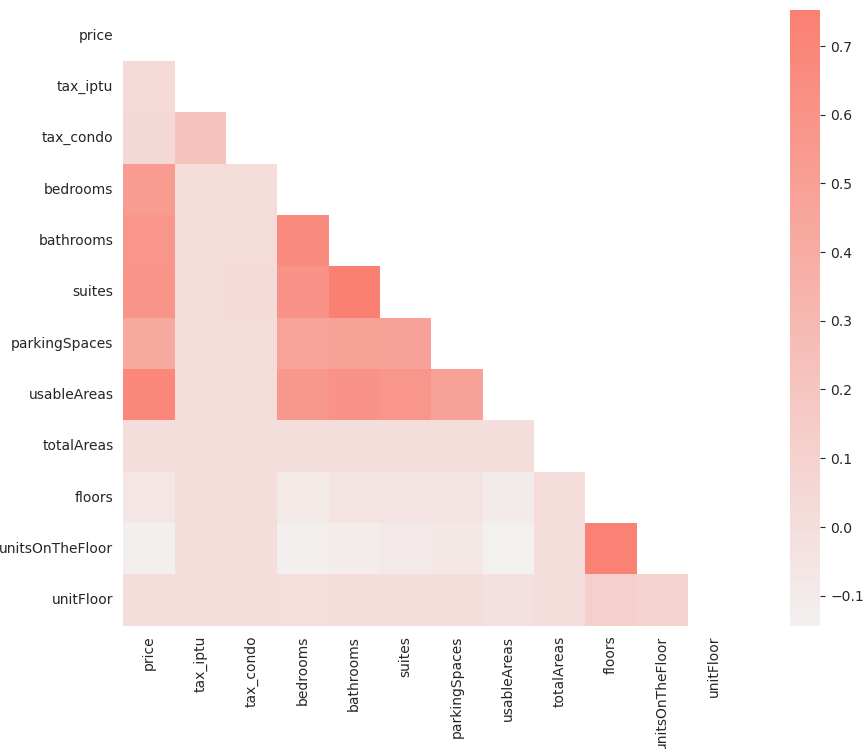

In [192]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

D:\Users\guifr\anaconda3\envs\estudo\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


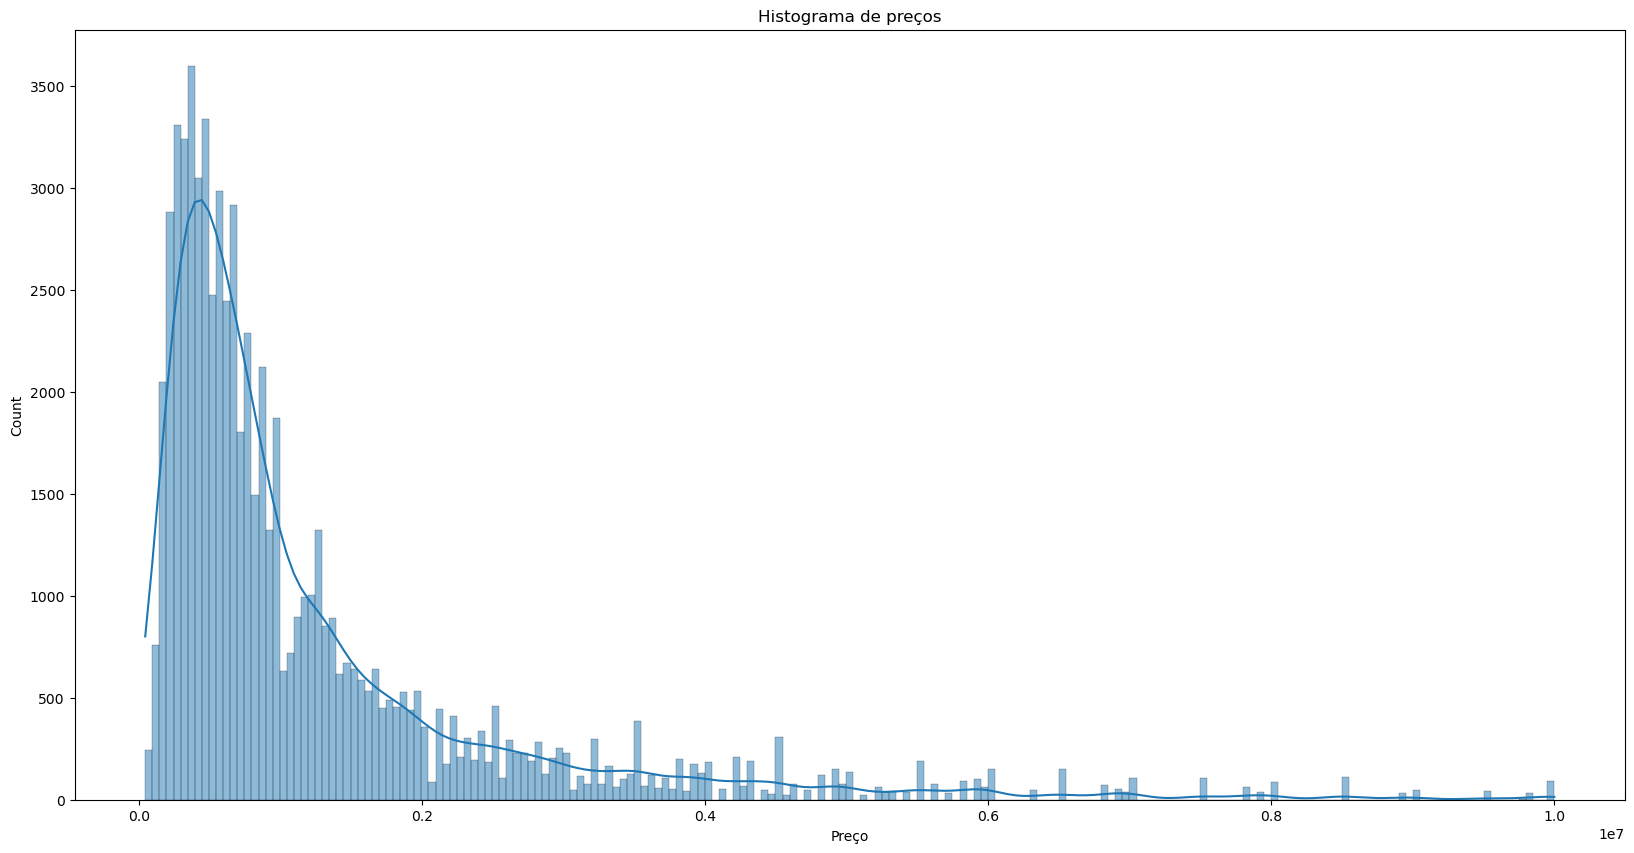

In [193]:
ax = sns.histplot(data=dados_imoveis, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

## Transformação logarítmica
Como vimos no último gráfico, a distribuição dos dados está muito distorcida para um dos lados, a distribuição está assimétrica. Assim, temos muito mais exemplos de instâncias com valores baixos do que com valores altos o que pode tornar nosso modelo mais enviesado para prever valores mais baixos para instâncias futuras. Por isso, aplicaremos uma transformação logarítmica aos valores, o que aproximará a distribuição de uma distribuição normal.

In [194]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))

D:\Users\guifr\anaconda3\envs\estudo\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [195]:
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,6.216184,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


D:\Users\guifr\anaconda3\envs\estudo\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


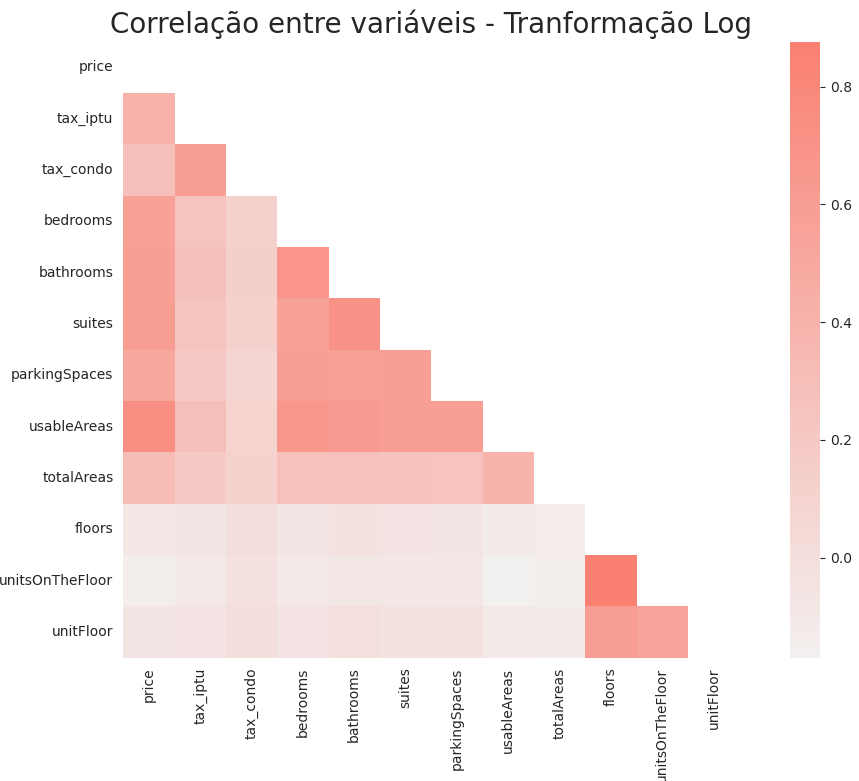

In [196]:
correlacao_transformado = df_transformado.select_dtypes(exclude=['object']).corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

D:\Users\guifr\anaconda3\envs\estudo\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


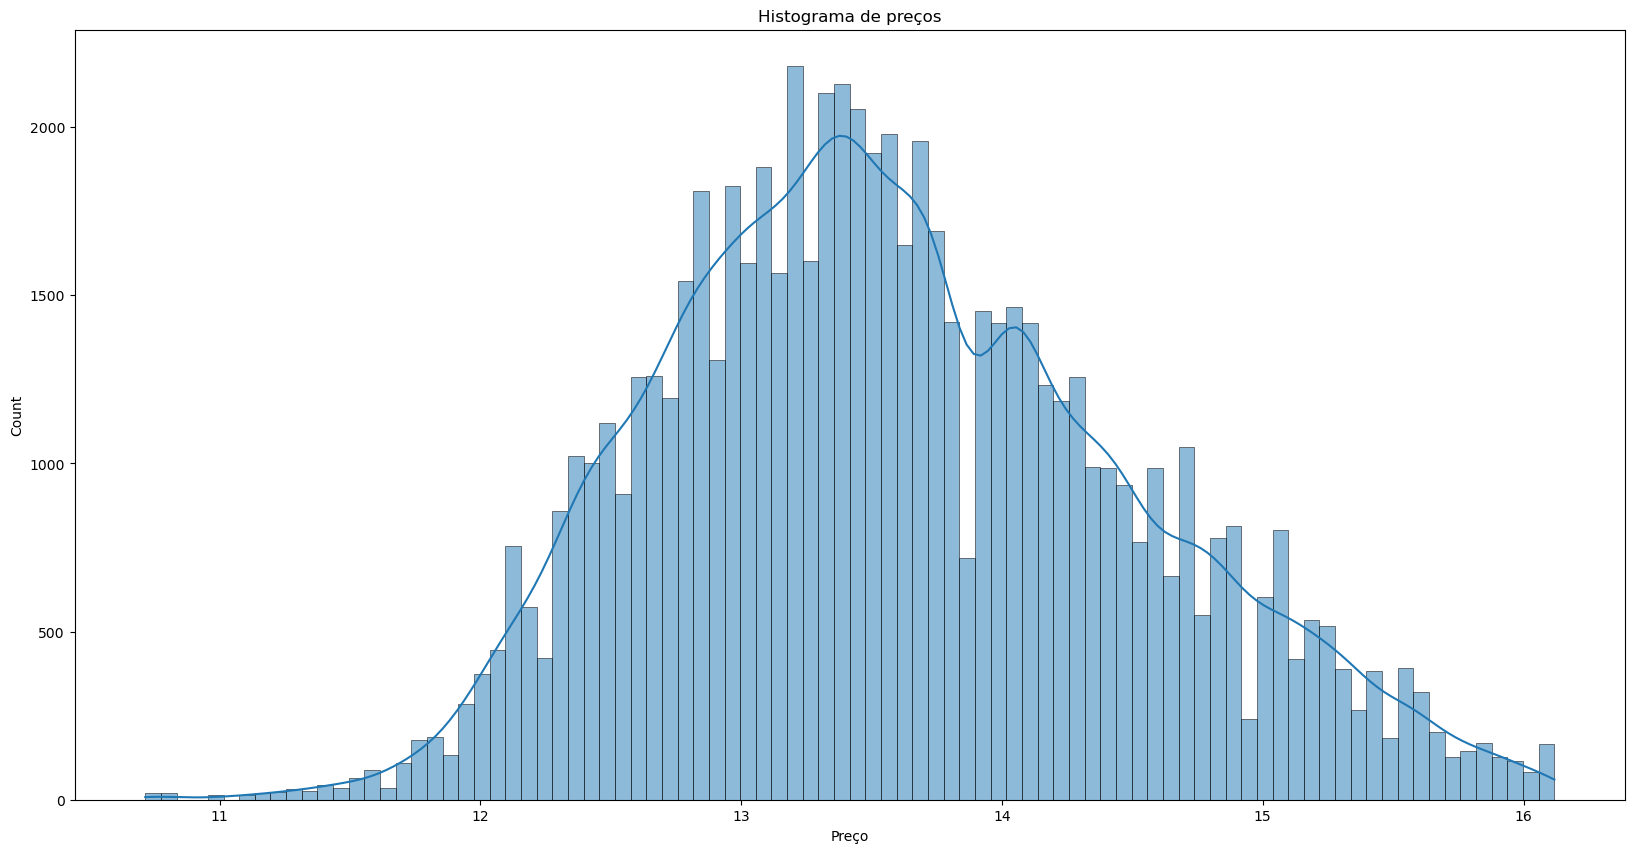

In [197]:
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

## Dummies
São usados para inserir variáveis categóricas no modelo.

In [198]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [199]:
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [200]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [201]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1) 
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,6.216184,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False


## Modelo

In [202]:
from sklearn.model_selection import train_test_split

X = dados_imoveis_dummies.drop('price', axis=1)
y = dados_imoveis_dummies['price']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_treino, y_treino)
previsao_lr = lr.predict(X_teste)
previsao_lr

array([13.26892614, 12.46845275, 12.9272849 , ..., 13.09196981,
       12.51441791, 14.48728582])

In [204]:
np.expm1(13.25768024)

572448.7513552749

## Desempenho

In [205]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.7882823305878776

# Árvore de decisão

In [206]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
dtr.fit(X_treino, y_treino)
previsao_dtr = dtr.predict(X_teste)
previsao_dtr

array([13.55920899, 12.34676121, 13.26539106, ..., 13.28566358,
       12.34676121, 14.55274625])

In [207]:
r2_dtr = r2_score(y_teste, previsao_dtr)
r2_dtr

0.7855249666266115

# Random Forest para Regressão

In [208]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)
rf.fit(X_treino, y_treino)
previsao_rf = rf.predict(X_teste)

In [209]:
r2_rf = r2_score(y_teste, previsao_rf)
r2_rf

0.8048211384975855

# Otimização

In [210]:
#divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold

#definindo o K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

## Cross validation para Árvore de decisão

In [211]:
from sklearn.model_selection import cross_val_score 

desempenho_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)

print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.783


## Random search validation

In [229]:
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2'],
}

In [230]:
from sklearn.model_selection import RandomizedSearchCV

# busca por parâmetros para a árvore de decisão
random_cv_dt = RandomizedSearchCV(
    dtr, 
    param_random_dt, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1
)

In [231]:
randomcv_dtr = random_cv_dt.fit(X_treino, y_treino)

In [232]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094842,0.002172,0.012500,0.006250,14,8,log2,14,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.840852,0.839050,0.839952,0.838094,0.834157,0.838421,0.002321,1
1,30.953763,3.511448,0.008158,0.004012,16,8,log2,16,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.836345,0.839509,0.828853,0.831771,0.831171,0.833530,0.003852,2
2,36.998015,1.883394,0.006014,0.000901,10,10,sqrt,12,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.831030,0.825564,0.831902,0.820889,0.812745,0.824426,0.007067,3
3,33.866075,0.603039,0.004267,0.000374,16,10,sqrt,8,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.801315,0.778136,0.771332,0.772601,0.795295,0.783736,0.012262,5
4,32.697269,0.533696,0.006955,0.002825,10,10,log2,10,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.817596,0.820397,0.820323,0.816844,0.801936,0.815419,0.006891,4


In [233]:
randomcv_dtr.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [234]:
randomcv_dtr.best_score_

0.8384210090205582

In [235]:
dtr_otimizado = DecisionTreeRegressor(criterion='absolute_error', max_depth=12, max_features='sqrt', 
                            min_samples_leaf=10, min_samples_split =10)
dtr_otimizado.fit(X_treino, y_treino)
predicao_dtr_otimizado = dtr_otimizado.predict(X_teste)
r2_score(y_teste, predicao_dtr_otimizado)

0.8267650772060686

## Cross validation para Floresta aleatória

In [236]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.797


## Random search validation

In [237]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

random_cv_rf = RandomizedSearchCV(
    rf, 
    param_random_rf, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [238]:
rf_randomcv = random_cv_rf.fit(X_treino, y_treino)

In [239]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,78.604845,2.636246,0.636254,0.019620,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.891672,0.896425,0.888167,0.894485,0.893626,0.892875,0.002806,2
1,74.865342,0.274423,0.626246,0.012459,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.891857,0.896488,0.888284,0.894599,0.893704,0.892986,0.002784,1
2,54.774792,0.246924,0.454130,0.001705,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.891621,0.896348,0.888056,0.894574,0.893589,0.892838,0.002837,3
3,86.815185,6.472285,0.823575,0.119402,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.891667,0.896141,0.887867,0.894296,0.893331,0.892661,0.002800,4
4,71.548132,4.631867,0.560482,0.078148,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.891419,0.895963,0.887696,0.894270,0.893205,0.892511,0.002824,5


In [240]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [241]:
rf_randomcv.best_score_

0.8929863759301757

In [242]:
rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)
rf_otimizado2.fit(X_treino, y_treino)
predicao_rf_otimizado2 = rf_otimizado2.predict(X_teste)
r2_score(y_teste, predicao_rf_otimizado2)

0.8951829381997104

## Escolhendo o melhor modelo

In [243]:
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(y_teste, predicao_dtr_otimizado))
print("Floresta Aleatória: %f" % r2_score(y_teste, predicao_rf_otimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenho_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(), 3))

Random Search
Árvore de Decisão: 0.826765
Floresta Aleatória: 0.895183
******************************
Cross Validation
Árvore de Decisão: 0.783000
Floresta Aleatória: 0.797000


In [244]:
#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [245]:
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
np.expm1(predicao_cliente_joana)

array([298307.56660107])